## Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import custom modules
import data_utils
import analysis
import plotting

%matplotlib inline

## Configuration

In [2]:
DATA_DIR = "data"
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11

## 1. Load Data

In [3]:
# Load metadata
metadata = data_utils.load_metadata(os.path.join(DATA_DIR, 'metadata.pkl'))

langNames = metadata['langNames']
langnameGroup = metadata['langnameGroup']
appearance_dict = metadata['appearance_dict']

print(f"Languages: {len(langNames)}")
print(f"Groups: {len(set(langnameGroup.values()))}")

Loaded metadata from data/metadata.pkl
Languages: 186
Groups: 11


In [4]:
# Load analysis results
results = analysis.load_analysis_results(DATA_DIR)

all_langs_position2num = results['all_langs_position2num']
all_langs_position2sizes = results['all_langs_position2sizes']
all_langs_average_sizes = results['all_langs_average_sizes']
filtered_position2num = results['filtered_position2num']
filtered_position2sizes = results['filtered_position2sizes']
lang2MAL = results['lang2MAL']

print(f"Languages with results: {len(lang2MAL)}")

Loaded all_langs_position2num.pkl
Loaded all_langs_position2sizes.pkl
Loaded all_langs_average_sizes.pkl
Loaded filtered_position2num.pkl
Loaded filtered_position2sizes.pkl
Loaded lang2MAL.pkl
All analysis results loaded from data/
Languages with results: 185


## 2. Explore MAL Data

In [5]:
# Show sample MAL data
sample_langs = list(lang2MAL.keys())[:5]
print("Sample MAL data:")
for lang in sample_langs:
    lang_name = langNames.get(lang, lang)
    mal_values = lang2MAL[lang]
    print(f"  {lang_name} ({lang}): {mal_values}")

Sample MAL data:
  Abaza (abq): {1: 1.5134613006817135}
  Abkhaz (ab): {1: 1.5861652015519552, 2: 1.3174704600090834}
  Afrikaans (af): {1: 5.571350125089238, 2: 3.377317699677352, 3: 2.7453080139036774, 4: 2.1183028521249825}
  Akuntsu (aqz): {1: 1.1122454158724058}
  Albanian (sq): {1: 3.4712174076501268, 2: 2.530140893650449, 3: 2.950727168280808}


In [6]:
# Statistics on MAL coverage
max_n_per_lang = {lang: max(mal.keys()) for lang, mal in lang2MAL.items() if mal}
print(f"Maximum n value per language:")
print(pd.Series(max_n_per_lang).describe())
print(f"\nLanguages with MAL data: {len(max_n_per_lang)}")
print(f"Languages without MAL data: {len(lang2MAL) - len(max_n_per_lang)}")

Maximum n value per language:
count    174.000000
mean       3.408046
std        1.865458
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        9.000000
dtype: float64

Languages with MAL data: 174
Languages without MAL data: 11


## 3. Plot MAL Curves (n=2)

Number of languages with data from n=1 to 2: 143
Mean values: [3.280172759093264, 2.450670144788442]


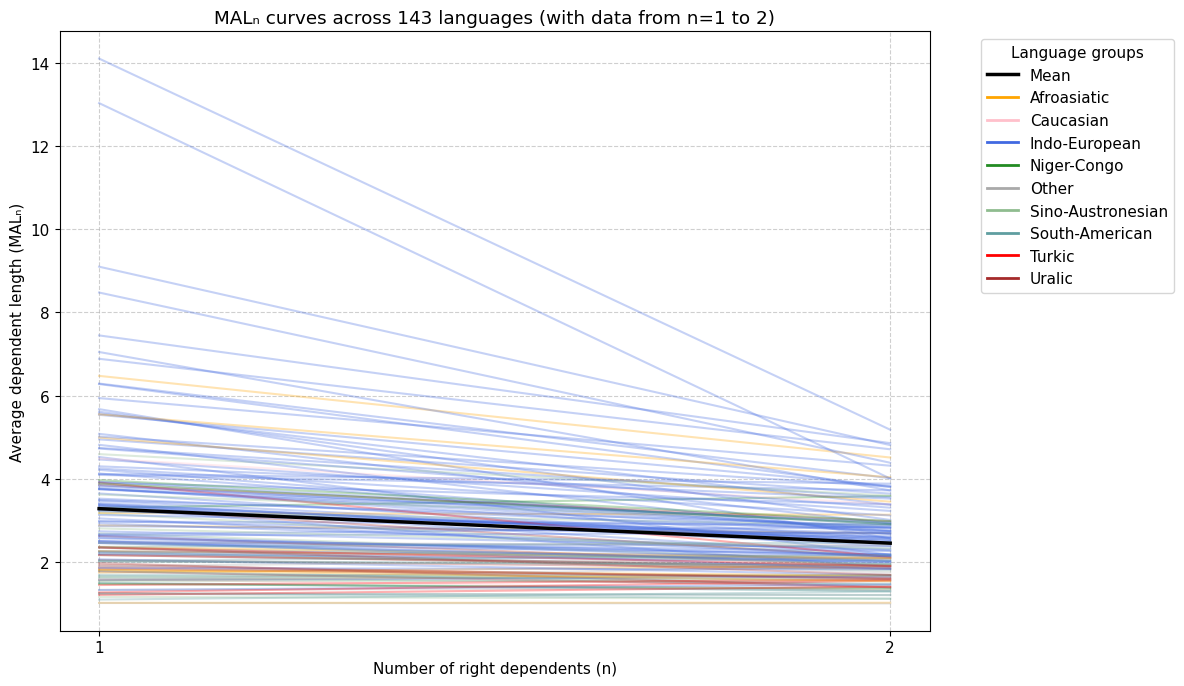

In [7]:
plotting.plot_mal_curves_with_groups(
    lang2MAL,
    langNames,
    langnameGroup,
    appearance_dict,
    n_required=2,
    figsize=(12, 7)
)

## 4. Plot MAL Curves (n=3)

Number of languages with data from n=1 to 3: 112
Mean values: [3.585952307714208, 2.618249139024473, 2.435941293499044]


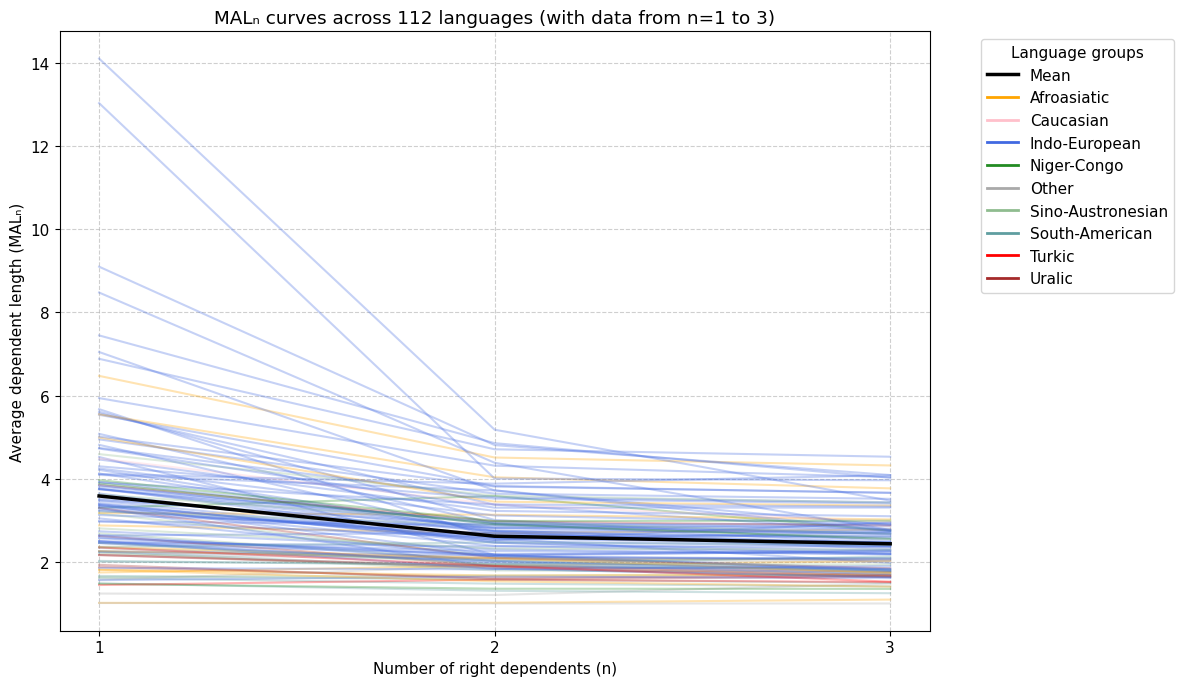

In [8]:
plotting.plot_mal_curves_with_groups(
    lang2MAL,
    langNames,
    langnameGroup,
    appearance_dict,
    n_required=3,
    figsize=(12, 7)
)

## 5. Plot MAL Curves (n=5)

Number of languages with data from n=1 to 5: 49
Mean values: [3.710482417208507, 2.8041297624896755, 2.644855361171737, 2.6147844012582486, 2.646118495442952]


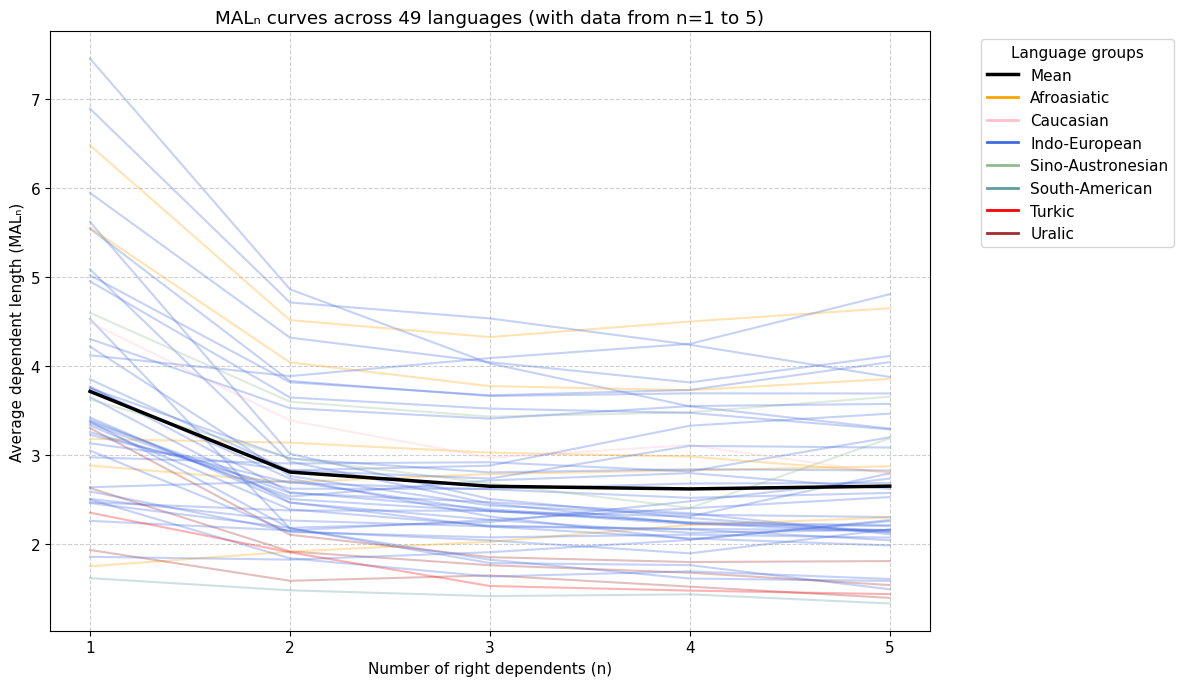

In [9]:
plotting.plot_mal_curves_with_groups(
    lang2MAL,
    langNames,
    langnameGroup,
    appearance_dict,
    n_required=5,
    figsize=(12, 7)
)

## 6. Plot MAL Heatmap

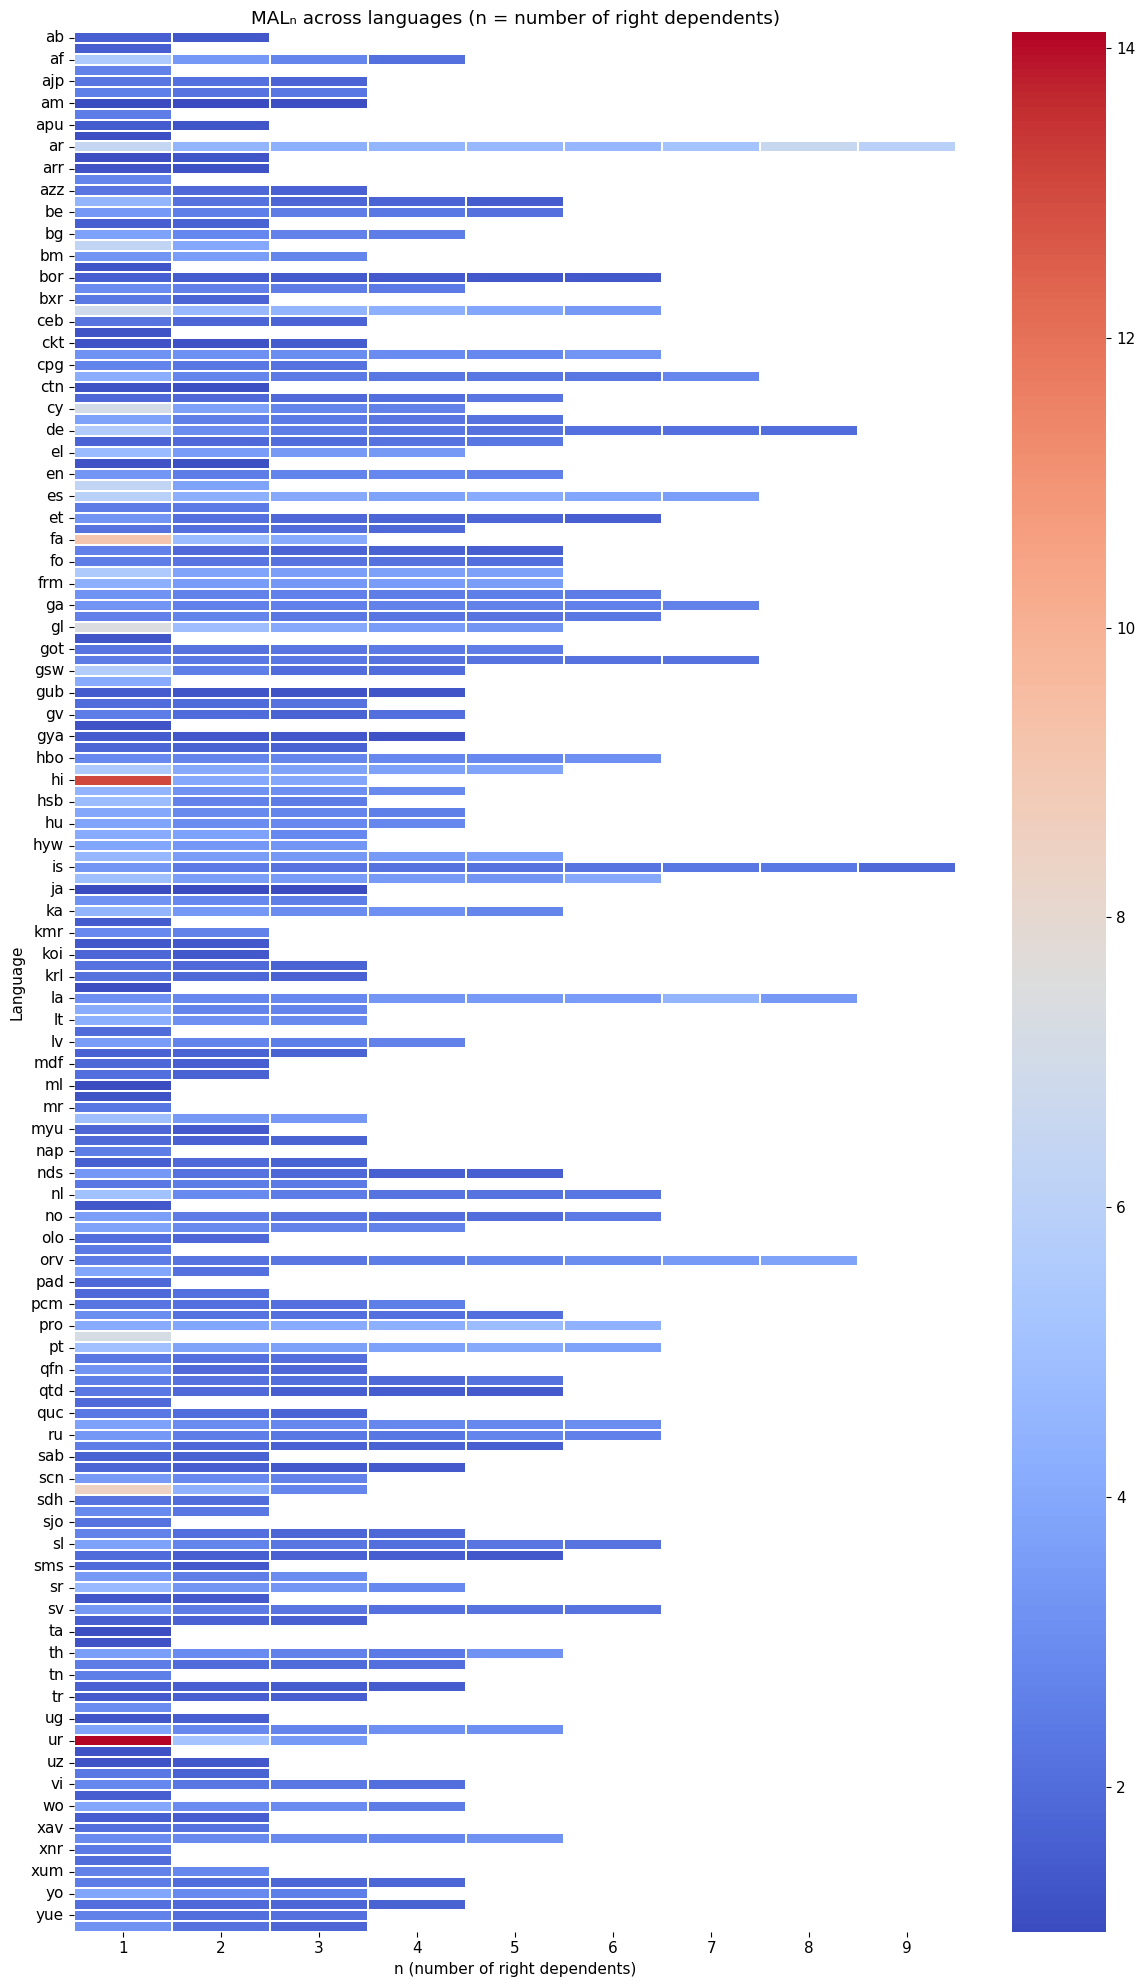

In [10]:
plotting.plot_mal_heatmap(
    lang2MAL,
    figsize=(12, 20),
    cmap="coolwarm"
)

## 7. Position Distribution Analysis

Explore the distribution of specific position types across languages.

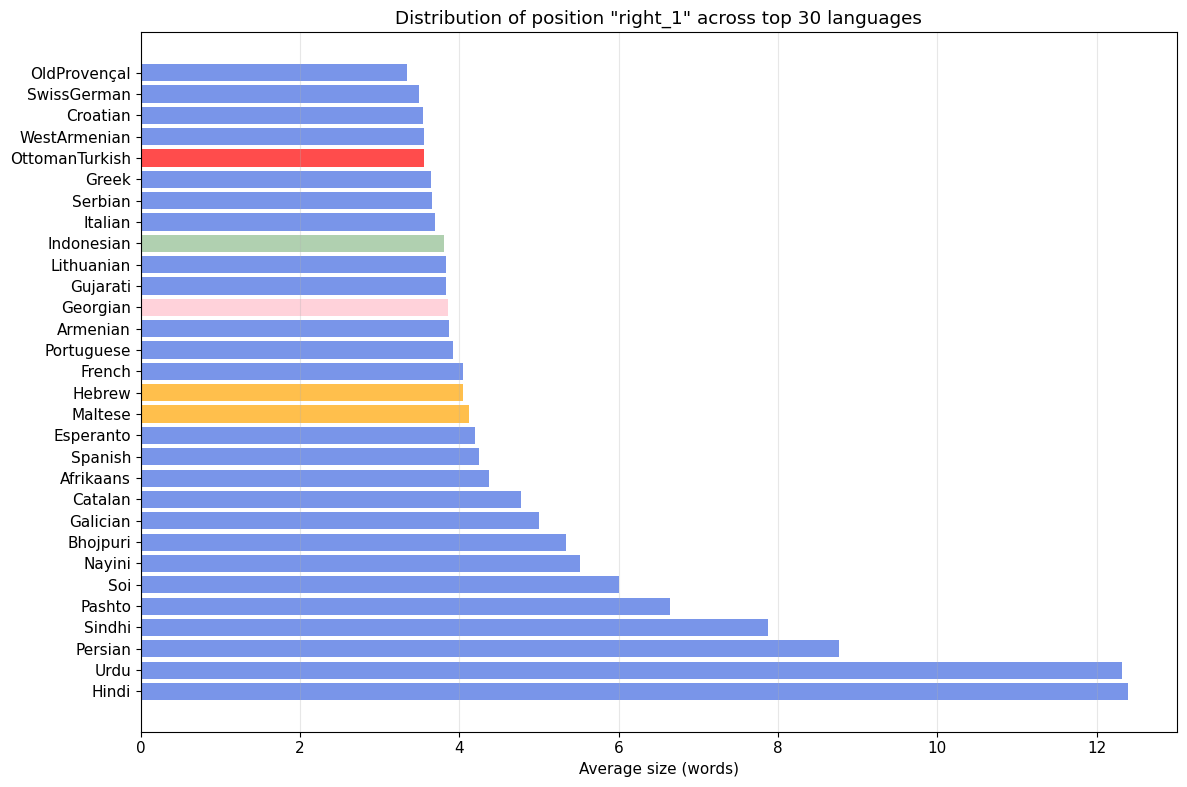

In [11]:
# Plot distribution of right_1 position
plotting.plot_position_distribution(
    all_langs_average_sizes,
    'right_1',
    langNames,
    langnameGroup,
    appearance_dict,
    top_n=30
)

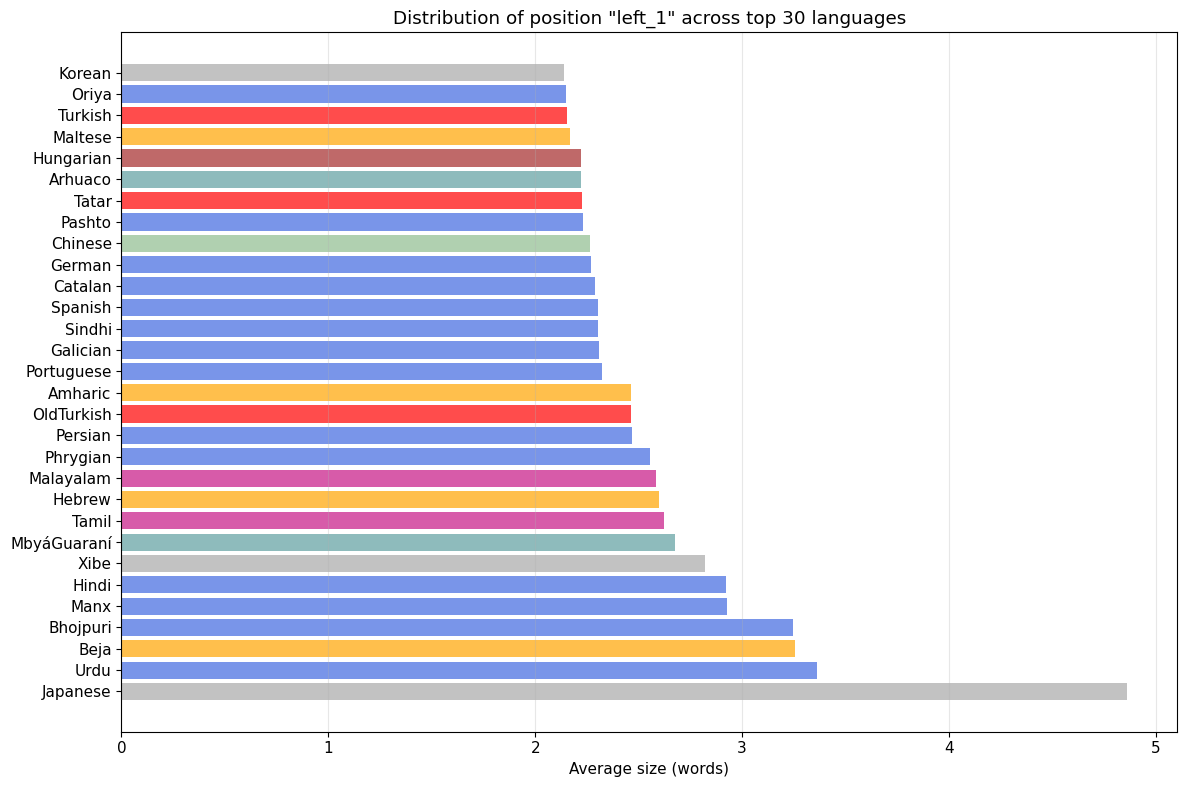

In [12]:
# Plot distribution of left_1 position
plotting.plot_position_distribution(
    all_langs_average_sizes,
    'left_1',
    langNames,
    langnameGroup,
    appearance_dict,
    top_n=30
)

## 8. Create DataFrame for 2D/3D Analysis

In [13]:
# Create DataFrame with MAL values for n=1,2,3
df_mal = []
for lang, mal_dict in lang2MAL.items():
    if 1 in mal_dict and 2 in mal_dict and 3 in mal_dict:
        lang_name = langNames.get(lang, lang)
        group = langnameGroup.get(lang_name, 'Other')
        df_mal.append({
            'language': lang_name,
            'code': lang,
            'group': group,
            'MAL1': mal_dict[1],
            'MAL2': mal_dict[2],
            'MAL3': mal_dict[3]
        })

df_mal = pd.DataFrame(df_mal)
print(f"Languages with MAL1, MAL2, MAL3: {len(df_mal)}")
df_mal.head()

Languages with MAL1, MAL2, MAL3: 112


,language,code,group,MAL1,MAL2,MAL3
0,Afrikaans,af,Indo-European,5.571350,3.377318,2.745308
1,Albanian,sq,Indo-European,3.471217,2.530141,2.950727
2,SwissGerman,gsw,Indo-European,5.674880,2.566857,1.973492
3,Amharic,am,Afroasiatic,1.014380,1.017432,1.093600
4,AncientGreek,grc,Indo-European,2.464220,2.372633,2.369337


## 9. 2D Scatter Plot: MAL1 vs MAL2

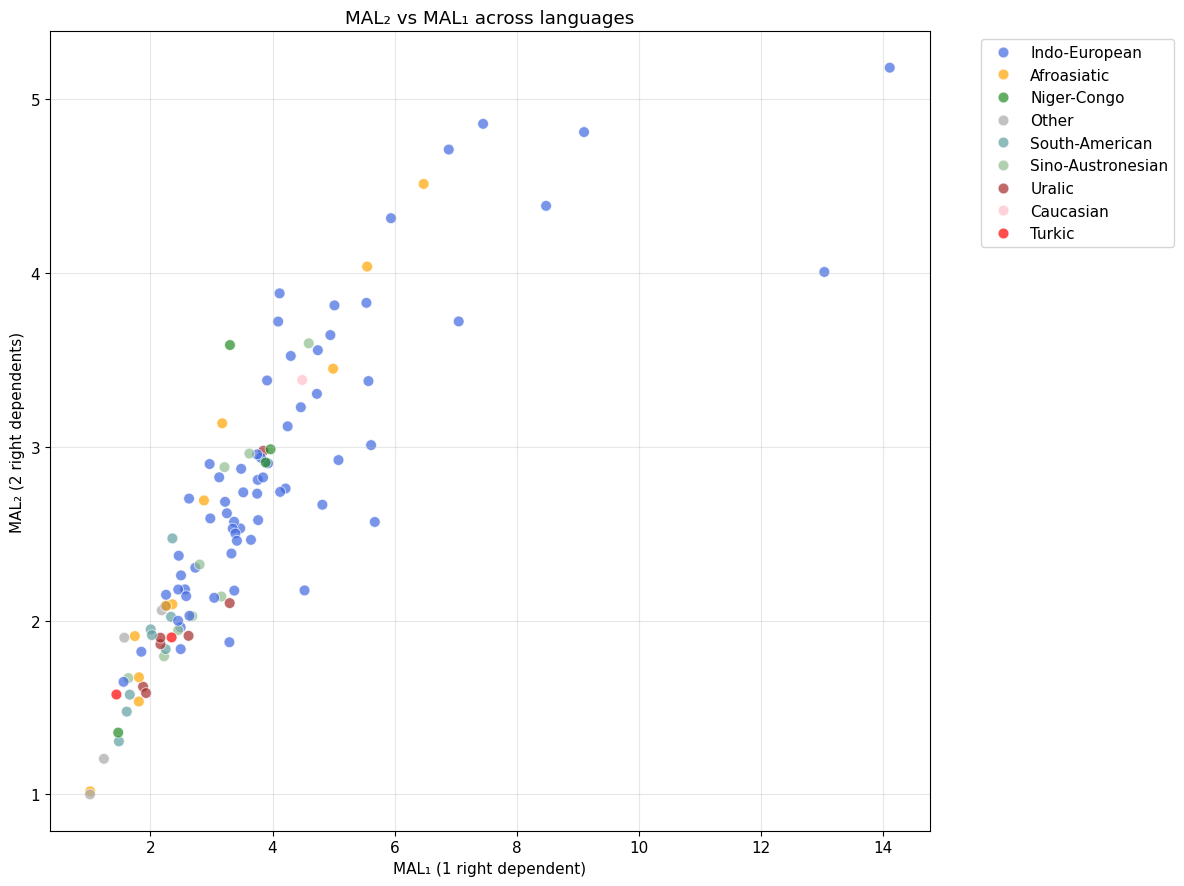

In [14]:
plotting.plot_scatter_2d(
    df_mal,
    'MAL1',
    'MAL2',
    'group',
    appearance_dict,
    title="MAL₂ vs MAL₁ across languages",
    xlabel="MAL₁ (1 right dependent)",
    ylabel="MAL₂ (2 right dependents)",
    figsize=(12, 9)
)

## 10. 3D Scatter Plot: MAL1 vs MAL2 vs MAL3

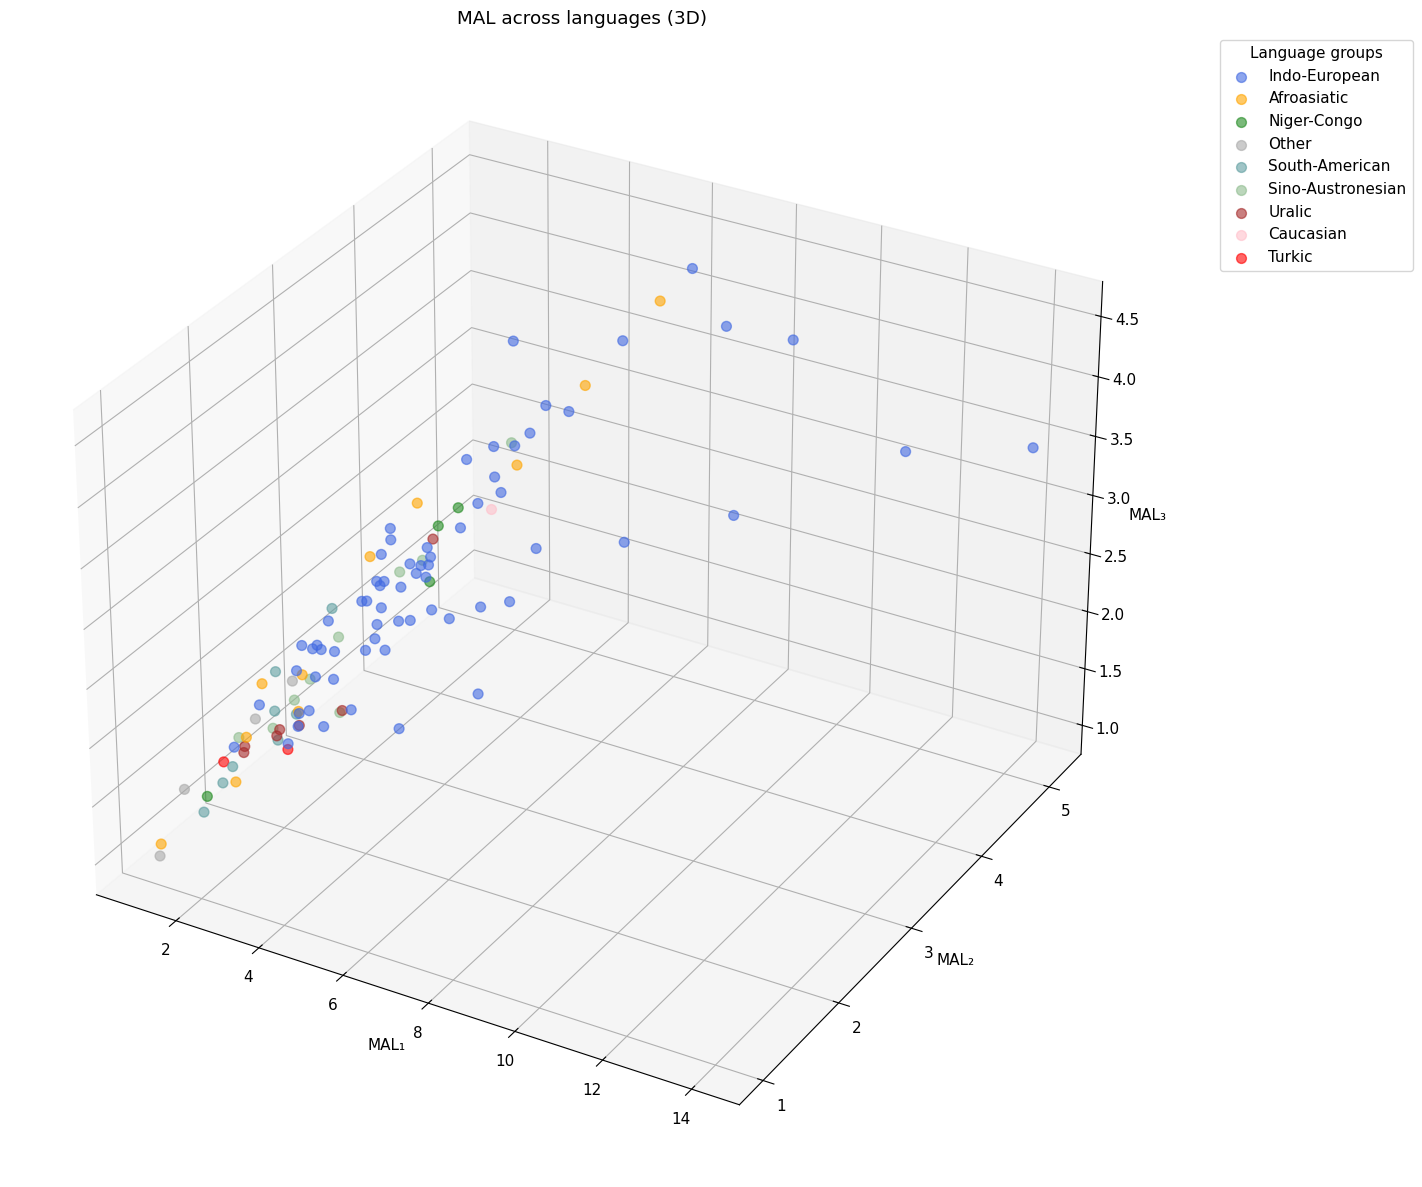

In [15]:
plotting.plot_scatter_3d(
    df_mal,
    'MAL1',
    'MAL2',
    'MAL3',
    'group',
    appearance_dict,
    title="MAL across languages (3D)",
    xlabel="MAL₁",
    ylabel="MAL₂",
    zlabel="MAL₃",
    figsize=(14, 12)
)

## 11. Group Statistics

In [16]:
# Compute group statistics
group_stats = df_mal.groupby('group')[['MAL1', 'MAL2', 'MAL3']].agg(['mean', 'std', 'count'])
print("Group statistics:")
print(group_stats)

Group statistics:
                       MAL1                      MAL2                  \
                       mean       std count      mean       std count   
group                                                                   
Afroasiatic        3.097846  1.782746    11  2.557783  1.104785    11   
Caucasian          4.486705       NaN     1  3.383573       NaN     1   
Indo-European      4.251167  2.231987    66  2.900178  0.806727    66   
Niger-Congo        3.158047  1.161467     4  2.708450  0.951282     4   
Other              1.502195  0.510576     4  1.541234  0.517685     4   
Sino-Austronesian  2.933653  0.854610     9  2.370065  0.641177     9   
South-American     1.967247  0.344002     8  1.818763  0.365787     8   
Turkic             1.895823  0.639193     2  1.738677  0.232281     2   
Uralic             2.559025  0.751109     7  1.993745  0.468669     7   

                       MAL3                  
                       mean       std count  
group        

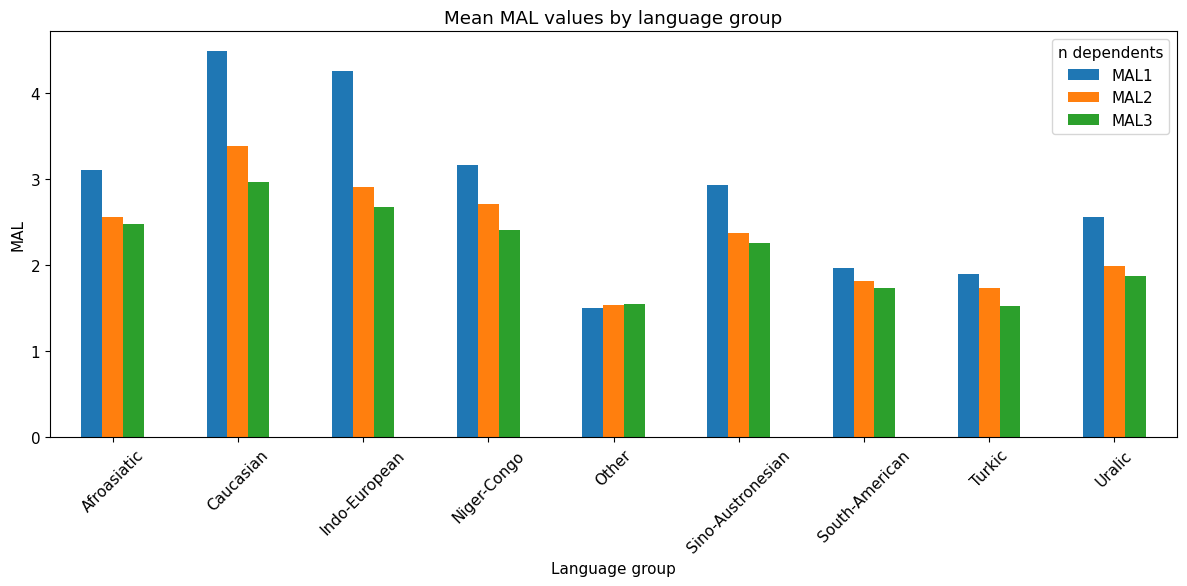

In [17]:
# Plot group means
group_means = df_mal.groupby('group')[['MAL1', 'MAL2', 'MAL3']].mean()
group_means.plot(kind='bar', figsize=(12, 6), rot=45)
plt.title("Mean MAL values by language group")
plt.xlabel("Language group")
plt.ylabel("MAL")
plt.legend(title="n dependents")
plt.tight_layout()
plt.show()

## 12. Custom Analysis

Use this section for your own exploratory analysis.

In [18]:
# Your custom analysis here

## Summary

This notebook has:
- ✅ Loaded analysis results from notebook 02
- ✅ Plotted MAL curves for n=2, 3, 5
- ✅ Created MAL heatmap across all languages
- ✅ Analyzed position distributions (left_1, right_1)
- ✅ Created 2D scatter plot (MAL1 vs MAL2)
- ✅ Created 3D scatter plot (MAL1 vs MAL2 vs MAL3)
- ✅ Computed group-level statistics

**Key observations**:
- MAL typically increases with n (more dependents → longer dependencies)
- Clear differences between language groups
- Position distributions vary significantly across languages